In [1]:
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("refined_data_pre.tsv", delimiter='\t', names=['tag', 'sentence'])
df

,tag,sentence
0,문제 정의,재난관리체계의 개선(일원화)방법으로는 여러 가지가 있을 수 있겠으나 여기서는 재난관...
1,문제 정의,이 연구는 재난관리에 관여하는 조직 및 부처들 간의 얼마만큼 재난관리와 관련한 공조...
2,대상 데이터,본 연구의 사용된 표본의 특성은 Table 5와 같다. 설문지 응답자들의 근무처를 ...
3,대상 데이터,우리나라에서 재난관리 활동에 영향을 주는 외적요인을 다중응답 분석을 이용해서 살펴보...
4,대상 데이터,연구자는 국가통합재난관리행정체계에 대한 연구+목적을 달성하기 위하여 소방방재청(기획...
...,...,...
63388,기술 정의,스마트시티는 일반적으로 물리적 도시시설이 사물인터넷 등 ICT 기술과 접목되어 효율...
63389,제안 방법,"본 연구에서는 스마트시티에 대한 국내외 현황을 조사하고, 리빙랩 방식으로 시민들의 ..."
63390,대상 데이터,국내외 스마트시티 현황 및 추진사례에서 발현된 핵심전략과 특화프로그램을 종합하여 생...
63391,성능/효과,"이에 따른 주요 실행계획으로는, ①도시 스마트시스템을 구축하여 건강하고 살기 좋은 ..."


In [3]:
tag = df['tag']

In [4]:
temp = pd.Series(tag)
print(temp.value_counts())

성능/효과     17494
제안 방법      7371
대상 데이터     7222
데이터처리      7039
후속연구       6878
문제 정의      6241
기술 정의      5981
이론/모형      3240
가설 설정      1927
Name: tag, dtype: int64


<AxesSubplot:>

/scratch/kedu19/.conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/scratch/kedu19/.conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/scratch/kedu19/.conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54952 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/scratch/kedu19/.conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/scratch/kedu19/.conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/scratch/kedu19

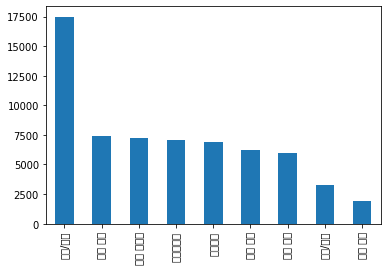

In [5]:
temp.value_counts().plot(kind = 'bar')

In [6]:
# ! python refine.py refine.regex.txt 1 < data_pre.tsv > refined_data_pre.tsv

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import csv
import numpy as np

In [8]:
LabelData = df['tag']
TextData = df['sentence']

x_text = TextData
y = LabelData
    
s = np.arange(TextData.shape[0])
np.random.shuffle(s)

TextData = TextData[s]
#print ("셔플 한 뒤의 문장 배열: ", TextData)
LabelData = LabelData[s]
#print ("셔플 한 뒤의 라벨 배열: ", LabelData) 

x_train, x_test = train_test_split(TextData, test_size=0.2, shuffle=False)
y_train, y_test = train_test_split(LabelData, test_size=0.2, shuffle=False)

        
    
# Write to TSV file
with open('train.tsv', 'wt', newline='', encoding='utf-8-sig') as f:
    print('Write train data to {} ...'.format('train.tsv'))
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(y_train, x_train))
with open('test.tsv', 'w', newline='', encoding='utf-8-sig') as f:
    print('Write test data to {} ...'.format('test.tsv'))
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(y_test, x_test))

Write train data to train.tsv ...
Write test data to test.tsv ...


In [9]:
train = pd.read_csv("train.tsv", delimiter='\t', names=['tag', 'sentence'])

In [10]:
train

,tag,sentence
0,성능/효과,균질한 검체로부터 다수의 시료를 취해 반복적으로 시험을 실시할 때 각 시험 결과의 ...
1,가설 설정,H5: PC 소프트웨어 불법복제에 대한 태도는 스마트폰 앱 불법복제 태도에 정(+)...
2,제안 방법,3) 가정폭력 유형에 따른 상관관계 효과크기는 어떠한가?
3,후속연구,"또한 아직까지 KTAS 수행능력에 영향을 미치는 요인을 분석한 선행연구가 없으므로,..."
4,성능/효과,또한 구조물의 내부 설계의 조밀성에 따라 크기는 유사해도 출력시간이나 소재의 소모량...
...,...,...
50709,문제 정의,본 연구의 목적은 119구급대원의 일반적 특성과 외상사건 경험 및 외상 후 스트레스...
50710,기술 정의,수인성 전염병은 물과 식품이 전염성 있는 병원성 미생물에 오염되어 발생하는 질환으로...
50711,성능/효과,"3년간 3,230명의 급성호흡기감염증환자에서 호흡기 검체를 채취하였고, 총 1,48..."
50712,데이터처리,뇌교육 기반 학습캠프 프로그램의 효과성을 검증하기 위해서 초등학생 대상 자기주도적 ...


In [11]:
tag = df['tag']
temp = pd.Series(tag)
print(temp.value_counts())

성능/효과     17494
제안 방법      7371
대상 데이터     7222
데이터처리      7039
후속연구       6878
문제 정의      6241
기술 정의      5981
이론/모형      3240
가설 설정      1927
Name: tag, dtype: int64


In [56]:
test = pd.read_csv("test.tsv", delimiter='\t', names=['tag', 'sentence'])

In [57]:
tag = df['tag']
temp = pd.Series(tag)
print(temp.value_counts())

성능/효과     17494
제안 방법      7371
대상 데이터     7222
데이터처리      7039
후속연구       6878
문제 정의      6241
기술 정의      5981
이론/모형      3240
가설 설정      1927
Name: tag, dtype: int64


In [58]:
tag = df['sentence']
tag

0        재난관리체계의 개선(일원화)방법으로는 여러 가지가 있을 수 있겠으나 여기서는 재난관...
1        이 연구는 재난관리에 관여하는 조직 및 부처들 간의 얼마만큼 재난관리와 관련한 공조...
2        본 연구의 사용된 표본의 특성은 Table 5와 같다. 설문지 응답자들의 근무처를 ...
3        우리나라에서 재난관리 활동에 영향을 주는 외적요인을 다중응답 분석을 이용해서 살펴보...
4        연구자는 국가통합재난관리행정체계에 대한 연구+목적을 달성하기 위하여 소방방재청(기획...
                               ...                        
63388    스마트시티는 일반적으로 물리적 도시시설이 사물인터넷 등 ICT 기술과 접목되어 효율...
63389    본 연구에서는 스마트시티에 대한 국내외 현황을 조사하고, 리빙랩 방식으로 시민들의 ...
63390    국내외 스마트시티 현황 및 추진사례에서 발현된 핵심전략과 특화프로그램을 종합하여 생...
63391    이에 따른 주요 실행계획으로는, ①도시 스마트시스템을 구축하여 건강하고 살기 좋은 ...
63392    건강하고 지속가능한 커뮤니티조성, 인종 및 공간 형평성을 통한 다양한 커뮤니티와 지...
Name: sentence, Length: 63393, dtype: object